# NISQA MODEL PERFORMANCE ON TEST SET

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pwd

/home/aleph/tesis/NISQA_analysis/NISQA_results_no_finetuning


/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NISQA-TTS (v1.0) results:
Pearson correlation coefficient: 0.7061387032981711
Mean absolute error: 0.9888123227100746
Mean squared error: 1.406283913159342
Root mean squared error: 1.185868421520424
R2 score: 0.3850006854961976

NISQA (v2.0) results:
Pearson correlation coefficient: 0.5742836212213555
Mean absolute error: 1.4495495400008034
Mean squared error: 3.3566319861326925
Root mean squared error: 1.832111346543297
R2 score: -0.46793001839539605

NISQA custom 1 results:
Pearson correlation coefficient: 0.5742836212213555
Mean absolute error: 1.4495495400008034
Mean squared error: 3.3566319861326925
Root mean squared error: 1.832111346543297
R2 score: -0.46793001839539605


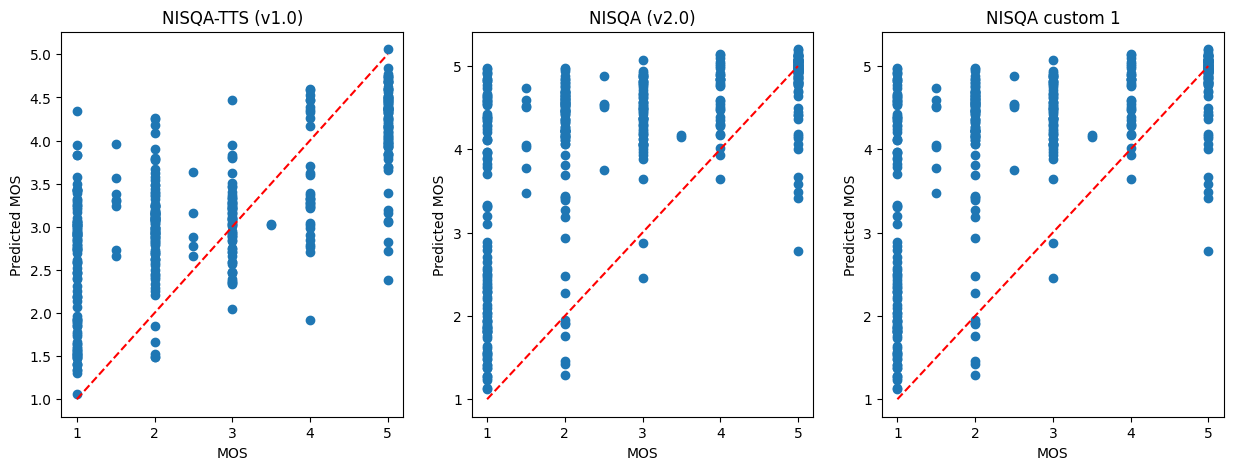

In [9]:
# read test set, NISQA-TTS (v1.0) results, and NISQA (v2.0) results
test = pd.read_csv('../../classifier/test.csv')
NISQA_tts = pd.read_csv('NISQA_v1_results.csv')
NISQA_2 = pd.read_csv('NISQA_v2_results.csv')
NISQA_custom_1 = pd.read_csv('../NISQA_finetuning_2/NISQA_custom_results.csv')

# discard every column except the 'stimuli' and 'mos_pred' columns
NISQA_tts = NISQA_tts[['stimuli', 'mos_pred']]
NISQA_2 = NISQA_2[['stimuli', 'mos_pred']]
NISQA_custom_1 = NISQA_custom_1[['stimuli', 'mos_pred']]

# pair the NISQA-TTS (v1.0) and NISQA (v2.0) results with the test set
NISQA_tts_paired = pd.merge(test, NISQA_tts, on='stimuli')
NISQA_2_paired = pd.merge(test, NISQA_2, on='stimuli')
NISQA_custom_1_paired = pd.merge(test, NISQA_custom_1, on='stimuli')

# calculate the Pearson correlation coefficient
NISQA_tts_corr = NISQA_tts_paired['mos_pred'].corr(NISQA_tts_paired['mos'])
NISQA_2_corr = NISQA_2_paired['mos_pred'].corr(NISQA_2_paired['mos'])
NISQA_custom_1_corr = NISQA_custom_1_paired['mos_pred'].corr(NISQA_custom_1_paired['mos'])

# compute mae, mse, rmse and r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_tts = mean_absolute_error(NISQA_tts_paired['mos'], NISQA_tts_paired['mos_pred'])
mae_2 = mean_absolute_error(NISQA_2_paired['mos'], NISQA_2_paired['mos_pred'])
mae_custom_1 = mean_absolute_error(NISQA_custom_1_paired['mos'], NISQA_custom_1_paired['mos_pred'])
mse_tts = mean_squared_error(NISQA_tts_paired['mos'], NISQA_tts_paired['mos_pred'])
mse_2 = mean_squared_error(NISQA_2_paired['mos'], NISQA_2_paired['mos_pred'])
mse_custom_1 = mean_squared_error(NISQA_custom_1_paired['mos'], NISQA_custom_1_paired['mos_pred'])
rmse_tts = mean_squared_error(NISQA_tts_paired['mos'], NISQA_tts_paired['mos_pred'], squared=False)
rmse_2 = mean_squared_error(NISQA_2_paired['mos'], NISQA_2_paired['mos_pred'], squared=False)
rmse_custom_1 = mean_squared_error(NISQA_custom_1_paired['mos'], NISQA_custom_1_paired['mos_pred'], squared=False)
r2_tts = r2_score(NISQA_tts_paired['mos'], NISQA_tts_paired['mos_pred'])
r2_2 = r2_score(NISQA_2_paired['mos'], NISQA_2_paired['mos_pred'])
r2_custom_1 = r2_score(NISQA_custom_1_paired['mos'], NISQA_custom_1_paired['mos_pred'])

# print the results
print('NISQA-TTS (v1.0) results:')
print('Pearson correlation coefficient:', NISQA_tts_corr)
print('Mean absolute error:', mae_tts)
print('Mean squared error:', mse_tts)
print('Root mean squared error:', rmse_tts)
print('R2 score:', r2_tts)
print()
print('NISQA (v2.0) results:')
print('Pearson correlation coefficient:', NISQA_2_corr)
print('Mean absolute error:', mae_2)
print('Mean squared error:', mse_2)
print('Root mean squared error:', rmse_2)
print('R2 score:', r2_2)
print()
print('NISQA custom 1 results:')
print('Pearson correlation coefficient:', NISQA_custom_1_corr)
print('Mean absolute error:', mae_custom_1)
print('Mean squared error:', mse_custom_1)
print('Root mean squared error:', rmse_custom_1)
print('R2 score:', r2_custom_1)

# plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(NISQA_tts_paired['mos'], NISQA_tts_paired['mos_pred'])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS')
ax[0].set_ylabel('Predicted MOS')
ax[0].plot([1, 5], [1, 5], 'r--')
ax[1].scatter(NISQA_2_paired['mos'], NISQA_2_paired['mos_pred'])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS')
ax[1].set_ylabel('Predicted MOS')
ax[1].plot([1, 5], [1, 5], 'r--')
ax[2].scatter(NISQA_custom_1_paired['mos'], NISQA_custom_1_paired['mos_pred'])
ax[2].set_title('NISQA custom 1')
ax[2].set_xlabel('MOS')
ax[2].set_ylabel('Predicted MOS')
ax[2].plot([1, 5], [1, 5], 'r--')
plt.show()


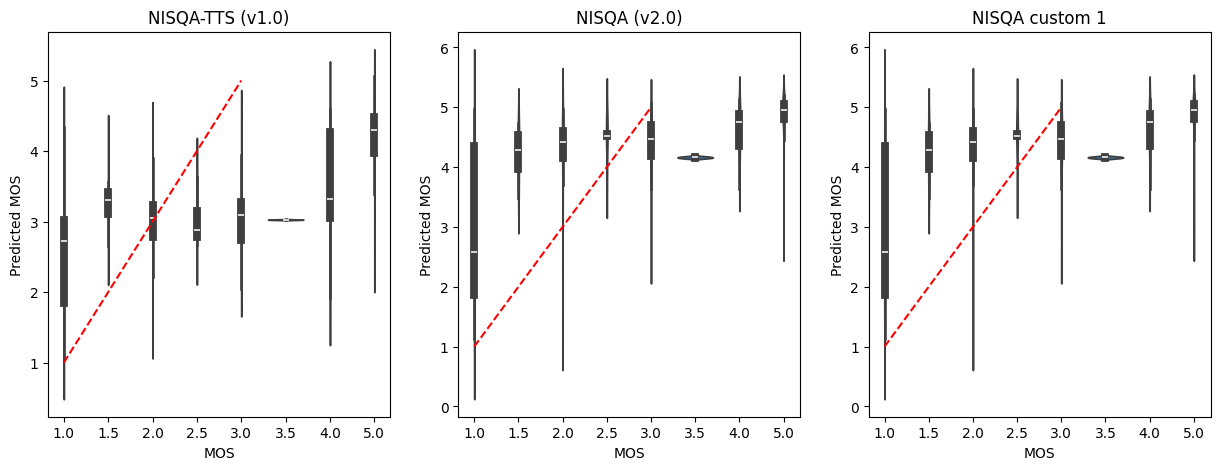

In [10]:
# now, lets plot the same data but with seaborn using a violin plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='mos', y='mos_pred', data=NISQA_tts_paired, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS')
ax[0].set_ylabel('Predicted MOS')
ax[0].plot([0, 4], [1, 5], 'r--')
sns.violinplot(x='mos', y='mos_pred', data=NISQA_2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS')
ax[1].set_ylabel('Predicted MOS')
ax[1].plot([0, 4], [1, 5], 'r--')
sns.violinplot(x='mos', y='mos_pred', data=NISQA_custom_1_paired, ax=ax[2])
ax[2].set_title('NISQA custom 1')
ax[2].set_xlabel('MOS')
ax[2].set_ylabel('Predicted MOS')
ax[2].plot([0, 4], [1, 5], 'r--')
plt.show()


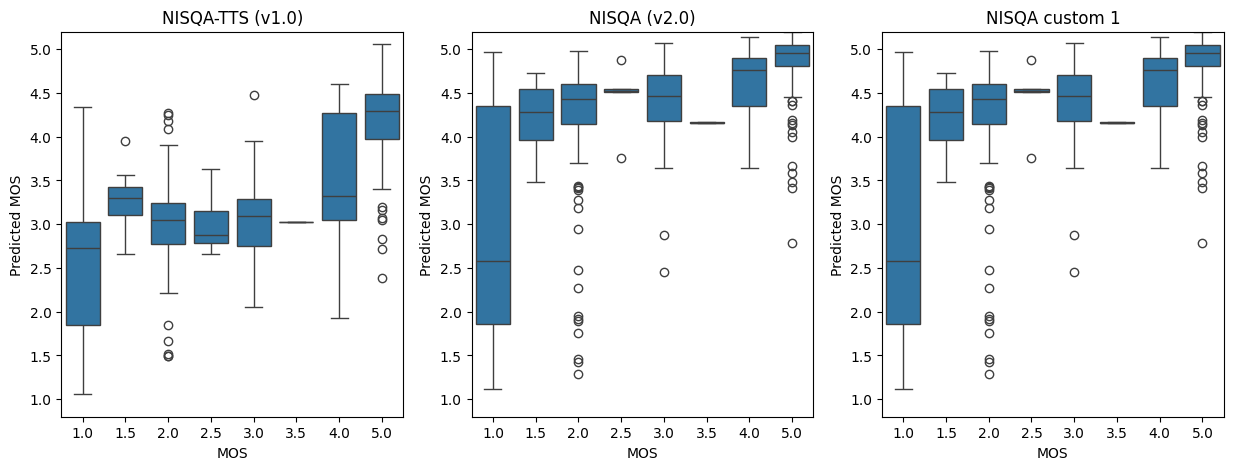

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='mos', y='mos_pred', data=NISQA_tts_paired, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS')
ax[0].set_ylabel('Predicted MOS')
ax[0].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS')
ax[1].set_ylabel('Predicted MOS')
ax[1].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_custom_1_paired, ax=ax[2])
ax[2].set_title('NISQA custom 1')
ax[2].set_xlabel('MOS')
ax[2].set_ylabel('Predicted MOS')
ax[2].set_ylim(0.8, 5.2)
plt.show()
